### EDA-2 (Математическая статистика в контексте EDA)

In [10]:
import pandas as pd

# Прочитаем датасет
data = pd.read_csv('data/wine_cleared.csv')

### Задание 2.1
Вычислите наименьший балл за вино в датасете.

In [11]:
data['points'].min()

80

### Задание 2.2
Вычислите наименьшую цену за бутылку в наборе данных.

In [12]:
data['price'].min()

4.0

### Вычисление средних значений
Наиболее популярные меры центральной тенденции, используемые в машинном обучении: среднее арифметическое, медиана, мода

In [13]:
import statistics

### Задание 2.3
Вычислите среднюю стоимость бутылки вина при помощи функции statistics.mean() библиотеки statistics. Округлите значение до сотых.

In [16]:
import statistics
statistics.mean(data['price'])

34.87766276627663

###  Задание 2.4 (Самопроверка)
Вычислите среднюю стоимость бутылки вина при помощи стандартных функций Python.

In [17]:
data['price'].mean()

34.87766276627663

In [23]:
# вариант 2
mean = sum(data['price']) / len(data['price'])
mean

34.87766276627663

### Задание 2.5
Вычислите медиану стоимости бутылки вина при помощи функции statistics.median() библиотеки statistics. Округлите значение до сотых.

In [19]:
import statistics
statistics.median(data['price'])

25.0

###  Задание 2.6
Вычислите медиану стоимости бутылки вина при помощи стандартных функций Python.

In [20]:
data['price'].median()

25.0

In [25]:
# вариант 2
count_price = len(data['price']) # количество записей цен
sorted_price = sorted(data['price']) # отсортированные цены

if count_price % 2: # при нечетном кол-ве элементов выбираем средний по индексу 
    median = sorted_price[round(0.5*(count_price-1))]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    index = round(0.5 * count_price)
    median = 0.5 * (sorted_price[index-1] + sorted_price[index])
median

25.0

###  Задание 2.7
Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи функции statistics.mode() библиотеки statistics. Округлите значение до сотых.

In [28]:
import statistics
statistics.mode(data['price'])

25.0

###  Задание 2.8
Вычислите моду стоимости бутылки (самую часто встречающуюся цену) вина при помощи стандартных функций Python и pandas.

In [30]:
data['price'].mode()

0    25.0
dtype: float64

In [32]:
# вариант 2
mode = round(data["price"].value_counts().index[0],2)
mode

25.0

###  Задание 3.3
Для расчёта коэффициента корреляции применим функцию df.corr() библиотеки pandas.
data.corr()
Вычислите коэффициент корреляции между переменными в датасете винных обзоров. В ответ запишите величину коэффициента корреляции между ценой за бутылку и баллами за вино. Округлите ответ до шести знаков после запятой.

In [33]:
data.corr()

,points,price
points,1.000000,0.399347
price,0.399347,1.000000


### Визуализация
Проверим наши данные винных обзоров на нормальность, используя метод визуализации.

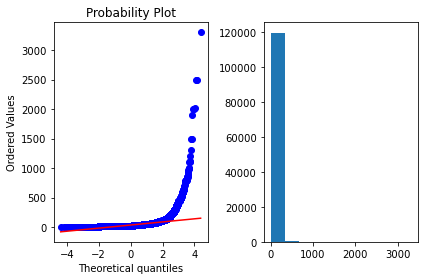

In [35]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['price'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['price']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

###  Задание 4.2
Постройте приведённые выше графики для признака points из датасета винных обзоров 

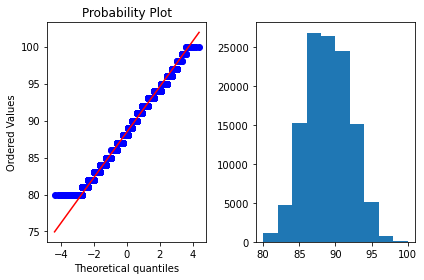

In [36]:
import matplotlib.pyplot as plt # библиотека визуализации
from scipy import stats # библиотека для расчетов

plt.subplot(1, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(data['points'], plot=plt) # qq plot

plt.subplot(1, 2, 2) # располагаем второй рисунок рядом
plt.hist(data['points']) # гистограмма распределения признака

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout

plt.show() # просмотр графика

###  Задание 5.1
Рассчитайте коэффициент корреляции Спирмена для признаков point и price. Ответ округлите до сотых.

In [38]:
data.corr(method='spearman')

,points,price
points,1.000000,0.587461
price,0.587461,1.000000


###  Задание 5.2
Рассчитайте коэффициент корреляции Кендалла для признаков point и price. Ответ округлите до сотых.

In [39]:
data.corr(method='kendall')

,points,price
points,1.000000,0.439358
price,0.439358,1.000000


### Корреляция Мэтьюса и пакет scikit-learn

In [40]:
from sklearn.metrics import matthews_corrcoef

x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса

-0.3333333333333333

### Визуализация корреляций. Матрица корреляций. График рассеивания. Парные отношения в наборе данных